# Unicorn Companies
A unicorn company is a privately held company with a current valuation of over $1 billion USD. This dataset consists of unicorn companies and startups across the globe as of November 2021, including country of origin, sector, select investors, and valuation of each unicorn. 

_Note former unicorn companies that have since exited due to IPO or acquisitions are not included in this list._

Not sure where to begin? Scroll to the bottom to find challenges!

[Source](https://www.cbinsights.com/research-unicorn-companies) of dataset. 

### TASK

You have been hired as a data scientist for a company that invests in start-ups. Your manager is interested in whether it is possible to predict whether a company reaches a valuation over 5 billion based on characteristics such as its country of origin, its category, and details about its investors.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("unicorn_companies.csv")
df.head()

,Company,Valuation ($B),Date Added,Country,Category,Select Investors
0,Bytedance,$140.00,4/7/17,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100.30,12/1/12,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,$95.00,1/23/14,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,$45.60,12/12/11,Sweden,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Canva,$40.00,1/8/18,Australia,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           917 non-null    object
 1   Valuation ($B)    917 non-null    object
 2   Date Added        917 non-null    object
 3   Country           917 non-null    object
 4   Category          917 non-null    object
 5   Select Investors  916 non-null    object
dtypes: object(6)
memory usage: 43.1+ KB


there are 917 observation and 6 fields in the data set

In [ ]:
df.columns

Index(['Company', 'Valuation ($B) ', 'Date Added', 'Country', 'Category',
       'Select Investors'],
      dtype='object')

In [ ]:
# since there is a space in the column name: 'Valuation $B' above, we will change it
df.columns = ['Company', 'Valuation ($B)', 'Date Added', 'Country', 'Category',
       'Select Investors']

### DATA CLEANING

In [ ]:
# confirm if there is missing value in any of the field
df.isna().sum()

Company             0
Valuation ($B)      0
Date Added          0
Country             0
Category            0
Select Investors    1
dtype: int64

In [ ]:
# there is a missing value in the select investors field
# what is the observation with the missing value
df[df["Select Investors"].isna()==True]

,Company,Valuation ($B),Date Added,Country,Category,Select Investors
705,LinkSure Network,$1.00,1/1/15,China,Mobile & telecommunications,NaN


as can be seen, the company whose investors data is missing is Linksure Network,located in China

In [ ]:
# verify the entries of the category field
df.groupby("Category").size()

Category
Artificial Intelligence                  3
Artificial intelligence                 69
Auto & transportation                   30
Consumer & retail                       23
Cybersecurity                           38
Data management & analytics             35
E-commerce & direct-to-consumer         97
Edtech                                  27
Fintech                                184
Finttech                                 1
Hardware                                32
Health                                  62
Internet software & services           164
Mobile & telecommunications             36
Other                                   51
Supply chain, logistics, & delivery     51
Travel                                  14
dtype: int64

it can be seen that some of the Artificial Intelligence and Fintect category entries were mistyped
and they have to be cleaned 

In [ ]:
df["Category"] = df["Category"].apply(lambda x: "Fintech" if x.startswith("Fint") else x.strip().capitalize())
df.groupby("Category").size()

Category
Artificial intelligence                 72
Auto & transportation                   30
Consumer & retail                       23
Cybersecurity                           38
Data management & analytics             35
E-commerce & direct-to-consumer         97
Edtech                                  27
Fintech                                185
Hardware                                32
Health                                  62
Internet software & services           164
Mobile & telecommunications             36
Other                                   51
Supply chain, logistics, & delivery     51
Travel                                  14
dtype: int64

In [ ]:
# verify the entries of the country field
df.groupby("Country").size()

Country
Argentina                 1
Australia                 5
Austria                   2
Belgium                   2
Bermuda                   1
Brazil                   14
Canada                   15
Chile                     1
China                   169
Colombia                  2
Croatia                   1
Czech Republic            1
Denmark                   2
Estonia                   1
Finland                   2
France                   19
Germany                  22
Hong Kong                 7
India                    48
Indonesia                 4
Indonesia,                1
Ireland                   3
Israel                   20
Japan                     6
Lithuania                 1
Luxembourg                1
Malaysia                  1
Mexico                    4
Netherlands               5
Nigeria                   1
Norway                    3
Philippines               2
Santa Clara               1
Senegal                   1
Singapore                12
South Africa

it can be verified that Indonesia and United States have some mistyped entries which have to be cleaned

In [ ]:
for i, entry in enumerate(list(df["Country"])):
    if entry.startswith("Indonesia"):
        df.loc[i, "Country"] = "Indonesia"
    elif entry.startswith("United States"):
        df.loc[i, "Country"] = "United States"

df.groupby("Country").size()

Country
Argentina                 1
Australia                 5
Austria                   2
Belgium                   2
Bermuda                   1
Brazil                   14
Canada                   15
Chile                     1
China                   169
Colombia                  2
Croatia                   1
Czech Republic            1
Denmark                   2
Estonia                   1
Finland                   2
France                   19
Germany                  22
Hong Kong                 7
India                    48
Indonesia                 5
Ireland                   3
Israel                   20
Japan                     6
Lithuania                 1
Luxembourg                1
Malaysia                  1
Mexico                    4
Netherlands               5
Nigeria                   1
Norway                    3
Philippines               2
Santa Clara               1
Senegal                   1
Singapore                12
South Africa              2
South Korea 

In [ ]:
# the date field is a string type which has to be converted to date type
df["Date Added"] = pd.to_datetime(df["Date Added"])

In [ ]:
# the valuation field is a string which is suppose to be a numeric value
# also remove the left dollar sign
df['Valuation ($B)'] = df['Valuation ($B)'].apply(lambda x: float(x[1:]))
df['Valuation ($B)'].head()

0    140.0
1    100.3
2     95.0
3     45.6
4     40.0
Name: Valuation ($B), dtype: float64

### FEATURE ENGINEERING

In [ ]:
# creating a column with the num of investors in each company
df["No. Investors"] = df['Select Investors'].apply(lambda x: 0 if x=="null" else len(str(x).split(",")))

In [ ]:
# view the dataframe again
df.head()

,Company,Valuation ($B),Date Added,Country,Category,Select Investors,No. Investors
0,Bytedance,140.0,2017-04-07,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4
1,SpaceX,100.3,2012-12-01,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",3
2,Stripe,95.0,2014-01-23,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",3
3,Klarna,45.6,2011-12-12,Sweden,Fintech,"Institutional Venture Partners, Sequoia Capita...",3
4,Canva,40.0,2018-01-08,Australia,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",3


### ANALYSE DATA

In [ ]:
# summary statistics
df.describe()

,Valuation ($B),No. Investors
count,917.000000,917.000000
mean,3.311690,2.826609
std,7.542281,0.513391
min,1.000000,1.000000
25%,1.070000,3.000000
50%,1.600000,3.000000
75%,3.000000,3.000000
max,140.000000,4.000000


In [ ]:
# Categories of companies and their count
categories = df.groupby("Category").size()

In [ ]:
categories_count_table = pd.DataFrame({"categories": categories.index, "counts": categories.values})
categories_count_table

,categories,counts
0,Artificial intelligence,72
1,Auto & transportation,30
2,Consumer & retail,23
3,Cybersecurity,38
4,Data management & analytics,35
5,E-commerce & direct-to-consumer,97
6,Edtech,27
7,Fintech,185
8,Hardware,32
9,Health,62


(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

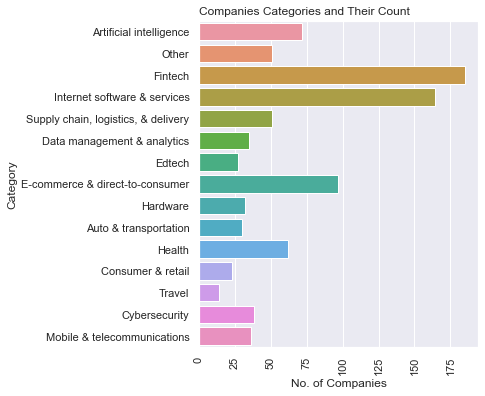

In [ ]:
sns.set(rc = {'figure.figsize':(5,6)})
sns.countplot(y=df['Category'])
plt.title("Companies Categories and Their Count", loc="left")
plt.xlabel("No. of Companies")
plt.ylabel("Category")
plt.xticks(rotation=90)
# ax = plt.gca()
# plt.draw()
# ax.set_yticklabels(labels=category_count_table.index)
# plt.show()

as can be seen from the above plot, the most occuring category of companies in our dataset is Fintech and the least occuring category is Travel

In [ ]:
# countries and their count
countries = df.groupby("Country").size()

In [ ]:
countries_df = pd.DataFrame({"countries": countries.index, "counts":countries.values})
countries_df

,countries,counts
0,Argentina,1
1,Australia,5
2,Austria,2
3,Belgium,2
4,Bermuda,1
5,Brazil,14
6,Canada,15
7,Chile,1
8,China,169
9,Colombia,2


(array([  0., 100., 200., 300., 400., 500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

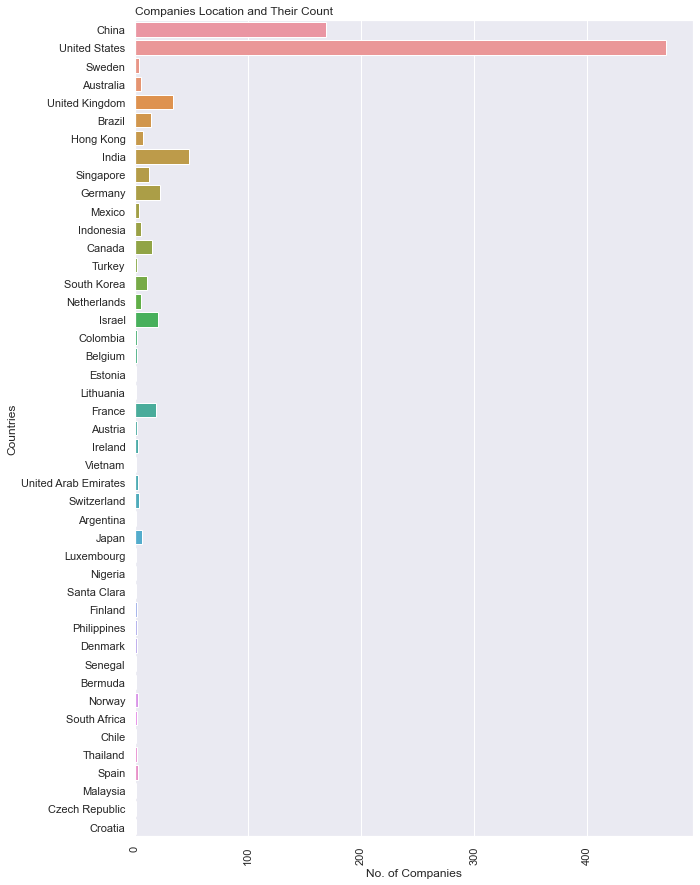

In [ ]:
sns.set(rc = {'figure.figsize':(10,15)})
sns.countplot(y=df['Country'])
plt.title("Companies Location and Their Count", loc="left")
plt.xlabel("No. of Companies")
plt.ylabel("Countries")
plt.xticks(rotation=90)

 470 companies of the unicon companies are from the and the second largest is China with 169 companies

In [ ]:
valuation_investors = df[["Valuation ($B)", "No. Investors"]]
valuation_investors.head()

,Valuation ($B),No. Investors
0,140.0,4
1,100.3,3
2,95.0,3
3,45.6,3
4,40.0,3


It turns out that the highest valuation $140 Billon from the data has only 4 investors which is the highest in the data while the minimum has 3 investors

In [ ]:
df[df["Valuation ($B)"] >100]

,Company,Valuation ($B),Date Added,Country,Category,Select Investors,No. Investors
0,Bytedance,140.0,2017-04-07,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4
1,SpaceX,100.3,2012-12-01,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",3


Only two countrises have valuation of over $100 Billion and they are in the categories of AI and Other from China and US respectively 

In [ ]:
fintech = df[df["Category"]=="Fintech"]

In [ ]:
print(f"There are {fintech.shape[0]} number of finteh companies in the dataset.")
print(f"The highest valuation of fintech company from the dataset is: ", fintech["Valuation ($B)"].max())
print(f"The least valuation of fintech company from the dataset is: ", fintech["Valuation ($B)"].min())
fintech.groupby("Country").size().sort_values(ascending=False)

There are 185 number of finteh companies in the dataset.
The highest valuation of fintech company from the dataset is:  95.0
The least valuation of fintech company from the dataset is:  1.0


Country
United States     97
United Kingdom    20
India             12
China              8
Germany            6
Brazil             4
Canada             4
Mexico             3
Singapore          3
Hong Kong          3
Indonesia          3
Israel             3
South Korea        2
Netherlands        2
Japan              2
France             2
Denmark            2
Australia          1
Nigeria            1
Philippines        1
Senegal            1
Sweden             1
Switzerland        1
Thailand           1
Austria            1
Argentina          1
dtype: int64

of the 185 fintech companies in the dataset, 95 of them are from the United States and 20 of them from United Kingdom.

In [ ]:
import math

valuation_1B = (df[df["Valuation ($B)"]==1].shape[0] / df.shape[0]) * 100
investors_1B = (df[df["No. Investors"]==1].shape[0] / df.shape[0]) * 100
print(f"{math.floor(valuation_1B)}% of the companies has valuation of $1 Billion")
print(f"{math.floor(investors_1B)}% of the companies has only 1 investors")

23% of the companies has valuation of $1 Billion
4% of the companies has only 1 investors


In [290]:
# data of companies with $5 Billion and above valuation
five_billion = df[df["Valuation ($B)"]>= 5]
five_billion.describe()      

,Valuation ($B),No. Investors
count,125.000000,125.000000
mean,12.792880,2.864000
std,17.594341,0.513432
min,5.000000,1.000000
25%,6.000000,3.000000
50%,8.000000,3.000000
75%,12.000000,3.000000
max,140.000000,4.000000


### CONCLUSION

<li> Less than 75% of the companies has 3 investors
<li> Less than 4% of the companies has only 1 investors
<li> Less than 23% of the companies has valuation of 1 Billion USD
<li> Most of the companies are from the United states (470) of which one of them has over $100 Billion in valuation
<li> The categories of the top 5 companies are: <b> fintech, internet software & services, ecommerce & direct-to-customers, AI and health </b>

### RECOMMENDATION
<li> The chances of making 1 Billion USD is slim with 1 investor
<li> To make $1 Billion as a startup, invest in Fintech, Internet Software & Services, Ecommerce & direct-to-customers, AI and Health. The chances are high.